# <h1 style="color:yellow"><strong>Pacotes e abertura dos dados</strong></h1>

In [153]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

In [154]:
df = pd.read_csv('dados/dados_ecommerce_limpos.csv', sep=';')

df.drop(columns=['Unnamed: 0'],inplace= True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.head()

,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,11,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,9,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,17,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,15,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,17,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539109 entries, 0 to 539108
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539109 non-null  object        
 1   StoreId      539109 non-null  int64         
 2   StockCode    539109 non-null  object        
 3   Description  539109 non-null  object        
 4   Quantity     539109 non-null  int64         
 5   InvoiceDate  539109 non-null  datetime64[ns]
 6   UnitPrice    539109 non-null  float64       
 7   CustomerID   406506 non-null  float64       
 8   Country      539109 non-null  object        
 9   TotalPrice   539109 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 41.1+ MB


# <h1 style="color:yellow"><strong>1) Quais as 10 lojas com maior faturamento em pedidos? Sumarize os dados dessa loja apresentando os seguintes campos:</strong></h1>
# <ul style="color:yellow">
#   <li style="color:yellow">StoreId</li>
#   <li style="color:yellow">Volume total de itens vendidos</li>
#   <li style="color:yellow">Valor total vendido</li>
# </ul>

In [156]:
faturamento_loja = df.groupby('StoreId')['Quantity', 'TotalPrice'].sum().reset_index()
faturamento_loja.sort_values(['TotalPrice'], inplace=True)
faturamento_loja = faturamento_loja.loc[::-1].head(10).reset_index(drop=True)
faturamento_loja

<ipython-input-156-338f6bf7a807>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  faturamento_loja = df.groupby('StoreId')['Quantity', 'TotalPrice'].sum().reset_index()


,StoreId,Quantity,TotalPrice
0,17,356701,725067.200
1,19,362332,721879.430
2,4,365025,688513.190
3,20,347350,613752.720
4,14,264195,578242.321
5,10,274856,572725.380
6,16,268243,571324.610
7,13,283209,570519.820
8,1,284368,561231.491
9,6,277833,560081.901


# <h1 style="color:yellow"><strong>2) Qual ticket médio mensal dos pedidos apresentados? Qual o volume médio mensal de vendas (todas as lojas)?</strong></h1>

In [157]:
pedidos = df.groupby(['InvoiceNo', 'InvoiceDate'])['TotalPrice', 'Quantity'].sum().reset_index()

medias_mensais = pedidos.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalPrice', 'Quantity'].mean().reset_index()
medias_mensais

<ipython-input-157-7aa565528edb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pedidos = df.groupby(['InvoiceNo', 'InvoiceDate'])['TotalPrice', 'Quantity'].sum().reset_index()
<ipython-input-157-7aa565528edb>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medias_mensais = pedidos.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalPrice', 'Quantity'].mean().reset_index()


,InvoiceDate,TotalPrice,Quantity
0,2010-12-31,476.345175,198.954931
1,2011-01-31,608.040732,345.609017
2,2011-02-28,413.801002,215.820648
3,2011-03-31,422.681754,215.230467
4,2011-04-30,390.316971,216.095174
5,2011-05-31,408.844345,200.771500
6,2011-06-30,446.737483,212.850242
7,2011-07-31,433.628781,233.546392
8,2011-08-31,508.573019,264.211199
9,2011-09-30,505.459351,266.328420


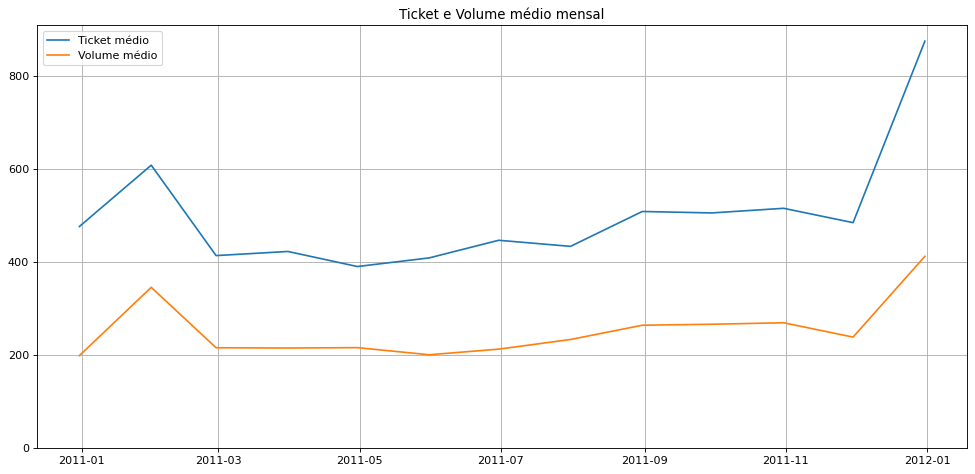

In [158]:
plt.figure(figsize=(15, 7), dpi=80)

plt.plot(medias_mensais.InvoiceDate, medias_mensais.TotalPrice, label = "Ticket médio")
plt.plot(medias_mensais.InvoiceDate, medias_mensais.Quantity, label = "Volume médio")

ax = plt.gca()
ax.set_ylim(ymin=0)

plt.title("Ticket e Volume médio mensal")

plt.legend()
plt.grid()
plt.show()

# <h1 style="color:yellow"><strong>3) Existe alguma correlação entre o país e o volume de itens vendidos? Qual o item mais vendido e o menos vendido no país com maior volume de vendas?</strong></h1>

In [159]:
vendas_pais = df.groupby('Country')['Quantity'].sum().reset_index()
vendas_pais.sort_values(['Quantity'], inplace=True)
vendas_pais = vendas_pais.loc[::-1].reset_index(drop=True)
vendas_pais.head()

,Country,Quantity
0,United Kingdom,4924659
1,Netherlands,201170
2,EIRE,151983
3,Germany,121051
4,France,113727


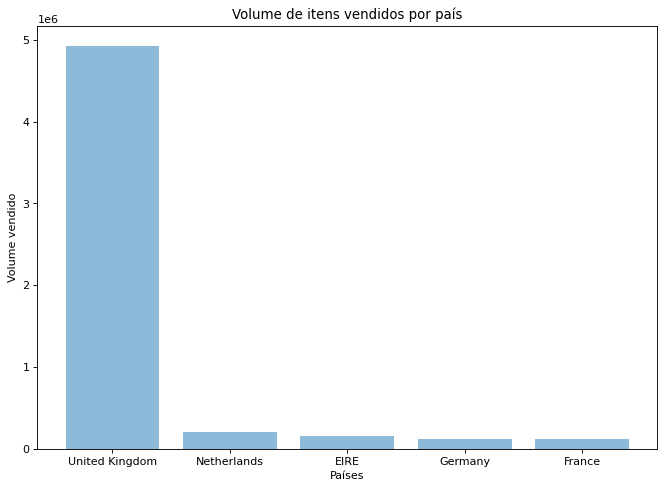

In [160]:
plt.figure(figsize=(10, 7), dpi=80)

plt.bar(vendas_pais.head().Country, vendas_pais.head().Quantity, align='center', alpha=0.5)

plt.title("Volume de itens vendidos por país")
plt.xlabel("Países")
plt.ylabel("Volume vendido")

plt.show()

In [161]:
pedidos_UK = df[df.Country == 'United Kingdom'].groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
pedidos_UK.sort_values(['Quantity'], inplace=True)
pedidos_UK = pedidos_UK.loc[::-1].reset_index(drop=True)
pedidos_UK.head()

,StockCode,Description,Quantity
0,23843,"PAPER CRAFT , LITTLE BIRDIE",161990
1,23166,MEDIUM CERAMIC TOP STORAGE JAR,151503
2,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,50726
3,85099B,JUMBO BAG RED RETROSPOT,45362
4,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37999


In [162]:
pedidos_UK.iloc[[0]]

,StockCode,Description,Quantity
0,23843,"PAPER CRAFT , LITTLE BIRDIE",161990


In [163]:
pedidos_UK[pedidos_UK.Quantity == 1]

,StockCode,Description,Quantity
4062,84569C,PACK 4 FLOWER/BUTTERFLY PATCHES,1
4063,21160,KEEP OUT GIRLS DOOR HANGER,1
4064,90126A,PINK BERTIE MOBILE PHONE CHARM,1
4065,79320,FLAMINGO LIGHTS,1
4066,23609,SET 10 CARDS SNOWY ROBIN 17099,1
...,...,...,...
4151,90025B,BAROQUE BUTTERFLY EARRINGS RED,1
4152,90025E,BAROQUE BUTTERFLY EARRINGS MONTANA,1
4153,84743C,ORANGE FELT VASE + FLOWERS,1
4154,90068,"RUBY GLASS NECKLACE 42""",1


In [164]:
itens_UK = np.unique(pedidos_UK.StockCode.to_list())
itens = np.unique(df.StockCode.to_list())
itens_not_UK = list(set(itens) - set(itens_UK))
itens_not_UK

['22145', '20957', '21412', '84963A', '84614A', '20678', '84803A', '90162A']

In [165]:
df[df.StockCode.isin(itens_not_UK)][['StockCode', 'Description']]

,StockCode,Description
1978,20957,PORCELAIN HANGING BELL SMALL
7185,84614A,PINK BAROQUE FLOCK CANDLE HOLDER
7899,84963A,PINK PAINTED KASHMIRI CHAIR
18876,22145,CHRISTMAS CRAFT HEART STOCKING
43976,21412,VINTAGE GOLD TINSEL REEL
88810,84803A,PINK ALLIUM ARTIFICIAL FLOWER
355370,20678,LARGE BLACK DIAMANTE HAIRSLIDE
443042,90162A,ANT SILVER TURQUOISE BOUDICCA RING


# <h1 style="color:yellow"><strong>4) Extra - A partir dos números apresentados e o seu conhecimento prévio, apresente ideais/estratégias que podem ser implementadas para auxiliar nossos lojistas a aumentarem o volume de vendas?</strong></h1>

## <h2 style="color:lightgreen"><strong>Analise dos clientes</strong></h2>

In [166]:
cliente_pedidos = df.groupby(['CustomerID', 'InvoiceNo', 'Country'])['Quantity', 'TotalPrice'].sum().reset_index()

clientes_recorrentes = cliente_pedidos.groupby(['CustomerID', 'Country'])['InvoiceNo'].count().reset_index()

cliente_por_pais = clientes_recorrentes.copy()

clientes_recorrentes = clientes_recorrentes[clientes_recorrentes.InvoiceNo > 1]
clientes_recorrentes = clientes_recorrentes.groupby(['Country']).size().reset_index(name='clientes_recorrentes')
clientes_recorrentes.sort_values(['clientes_recorrentes'], inplace=True, ascending=False)
clientes_recorrentes

<ipython-input-166-7fa7c84e06dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cliente_pedidos = df.groupby(['CustomerID', 'InvoiceNo', 'Country'])['Quantity', 'TotalPrice'].sum().reset_index()


,Country,clientes_recorrentes
31,United Kingdom,2762
12,Germany,74
11,France,62
26,Spain,21
2,Belgium,18
28,Switzerland,16
23,Portugal,15
0,Australia,9
10,Finland,7
16,Italy,7


In [167]:
cliente_por_pais = cliente_por_pais.groupby(['Country']).size().reset_index(name='cliente')
cliente_por_pais.sort_values(['cliente'], inplace=True, ascending=False)
cliente_por_pais

,Country,cliente
35,United Kingdom,3949
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


## <h2 style="color:lightgreen"><strong>Faturamento por cliente</strong></h2>

In [168]:
vendas_pais = df.groupby('Country')['Quantity' , "TotalPrice"].sum().reset_index()
vendas_pais.sort_values(['Country'], inplace=True)


<ipython-input-168-4cd11f3e3efe>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_pais = df.groupby('Country')['Quantity' , "TotalPrice"].sum().reset_index()


In [169]:
cliente_por_pais.sort_values(['Country'], inplace=True)

In [170]:
clientes_recorrentes.sort_values(['Country'], inplace=True)

In [171]:
dados_por_cliente = pd.merge(pd.merge(vendas_pais,cliente_por_pais, on='Country', how='outer'),clientes_recorrentes, on='Country', how='outer')
dados_por_cliente.fillna(0, inplace=True)
dados_por_cliente['Clients_return_percent'] = dados_por_cliente.clientes_recorrentes / dados_por_cliente.cliente * 100
dados_por_cliente['Quantity_per_client'] = dados_por_cliente.Quantity / dados_por_cliente.cliente
dados_por_cliente['TotalPrice_per_client'] = dados_por_cliente.TotalPrice / dados_por_cliente.cliente
dados_por_cliente.sort_values(['TotalPrice'], inplace=True, ascending=False)
dados_por_cliente

,Country,Quantity,TotalPrice,cliente,clientes_recorrentes,Clients_return_percent,Quantity_per_client,TotalPrice_per_client
36,United Kingdom,4924659,9.860952e+06,3949.0,2762.0,69.941757,1.247065e+03,2.497076e+03
10,EIRE,151983,3.036311e+05,3.0,3.0,100.000000,5.066100e+04,1.012104e+05
24,Netherlands,201170,2.862311e+05,9.0,6.0,66.666667,2.235222e+04,3.180346e+04
14,Germany,121051,2.359759e+05,95.0,74.0,77.894737,1.274221e+03,2.483957e+03
13,France,113727,2.220263e+05,87.0,62.0,71.264368,1.307207e+03,2.552027e+03
0,Australia,84457,1.399653e+05,9.0,9.0,100.000000,9.384111e+03,1.555171e+04
31,Spain,29067,6.837964e+04,31.0,21.0,67.741935,9.376452e+02,2.205795e+03
33,Switzerland,30933,5.779320e+04,21.0,16.0,76.190476,1.473000e+03,2.752057e+03
3,Belgium,23322,4.148172e+04,25.0,18.0,72.000000,9.328800e+02,1.659269e+03
32,Sweden,36529,4.016075e+04,8.0,4.0,50.000000,4.566125e+03,5.020094e+03


## <h2 style="color:lightgreen"><strong>Explorado nos produtos</strong></h2>

In [172]:
pedidos_UK = df[df.Country == 'United Kingdom'].groupby(['StockCode', 'Description'])['Quantity', 'TotalPrice'].sum().reset_index()
pedidos_UK.sort_values(['TotalPrice'], inplace=True)
pedidos_UK = pedidos_UK.loc[::-1].reset_index(drop=True)
pedidos_UK.head()

<ipython-input-172-b604f4cc824e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pedidos_UK = df[df.Country == 'United Kingdom'].groupby(['StockCode', 'Description'])['Quantity', 'TotalPrice'].sum().reset_index()


,StockCode,Description,Quantity,TotalPrice
0,23843,"PAPER CRAFT , LITTLE BIRDIE",161990,336939.20
1,AMAZONFEE,AMAZON FEE,34,249042.68
2,DOT,DOTCOM POSTAGE,707,206252.06
3,23166,MEDIUM CERAMIC TOP STORAGE JAR,151503,158021.94
4,22423,REGENCY CAKESTAND 3 TIER,11759,150115.14
